In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Load input files
train3FileName = "train3_oddYr.txt"
train5FileName = "train5_oddYr.txt"
test3FileName = "test3_oddYr.txt"
test5FileName = "test5_oddYr.txt"

train3 = np.loadtxt(train3FileName, dtype=int)
train5 = np.loadtxt(train5FileName, dtype=int)
test3 = np.loadtxt(test3FileName, dtype=int)
test5 = np.loadtxt(test5FileName, dtype=int)

In [3]:
print(train3.shape)
print(train5.shape)
print(test3.shape)
print(test5.shape)

(700, 64)
(700, 64)
(400, 64)
(400, 64)


In [4]:
# Overall input data
trainData = np.concatenate((train3, train5), axis=0)
testData = np.concatenate((test3, test5), axis=0)
print(trainData.shape)
print(testData.shape)

(1400, 64)
(800, 64)


In [5]:
# Overall labels
trainLabels = [0] * train3.shape[0] + [1] * train5.shape[0]
testLabels = [0] * test3.shape[0] + [1] * test5.shape[0]
print(len(trainLabels))
print(len(testLabels))

1400
800


In [6]:
# Helper routines
def sigmoid(w, x):
    pred = np.dot(w, x)
    return (1.0 / (1.0 + np.exp(-pred)))

def gradient(x, yt, w):
    derivative = np.multiply((yt - sigmoid(w, x)), x)
    return derivative

def hessian(x, w):
    secondDerivative = np.multiply(sigmoid(w,x) * (1-sigmoid(w,x)), np.dot(np.array([x]).transpose(), np.array([x])) )
    return -secondDerivative
    
def logLikelihood(x, yt, w):
    L = yt * np.log(sigmoid(w,x)) + (1-yt) * np.log(1-sigmoid(w,x))
    return L

def predict(xData, yData, w):
    T = xData.shape[0]
    numCorrect = 0
    for t in range(T):
        sPred = sigmoid(w, xData[t])
        if (yData[t]==1 and sPred>0.5) or (yData[t]==0 and sPred<0.5):
            numCorrect += 1
    err = float(T - numCorrect) / float(T)
    return err

In [7]:
# Learn the model
def fitByGradientAscent(xData, yData, numSteps):
    T = xData.shape[0]
    eta = 0.02 / T        # Suggested setting
    w = np.zeros(xData.shape[1])
    
    #print(T)
    #print(eta)
    #print(w)
    
    # For plotting
    listLw = []
    listErr = []
    
    for i in tqdm(range(numSteps)):
        sumdL = 0.0
        sumLw = 0.0
        for t in range(T):
            sumLw += logLikelihood(xData[t], yData[t], w)
            sumdL += gradient(xData[t], yData[t], w)

        # Update weights
        w = w + eta * sumdL
        
        # For plotting
        listLw.append(sumLw)
        listErr.append(predict(xData, yData, w))
    return w, listLw, listErr

In [8]:
# Learn the model
def fitByNewtonMethod(xData, yData, numSteps):
    T = xData.shape[0]
    w = np.zeros(xData.shape[1])
    w = w.reshape(len(w),1)
    
    #print(T)
    #print(w)
    #print(w.shape)
    #print(w.transpose())
    #print(w.transpose().shape)
    
    # For plotting
    listLw = []
    listErr = []
    
    for i in tqdm(range(numSteps)):
        sumdL = 0.0
        sumLw = 0.0
        sumHessian = 0.0
        for t in range(T):
            sumLw += logLikelihood(xData[t], yData[t], w.transpose())
            sumdL += gradient(xData[t], yData[t], w.transpose())
            sumHessian += hessian(xData[t], w.transpose())

        # Update weights
        w = w - np.matmul(np.linalg.inv(sumHessian), np.array([sumdL]).transpose())
        #print(w)
        
        # For plotting
        listLw.append(sumLw)
        listErr.append(predict(xData, yData, w.transpose()))
    return w.transpose(), listLw, listErr

## Newton's Method

In [9]:
numSteps = 10
wNM, listLwNM, listErrNM = fitByNewtonMethod(trainData, trainLabels, numSteps)

100%|██████████| 10/10 [00:02<00:00,  3.94it/s]


Text(0, 0.5, 'Log-likelihood')

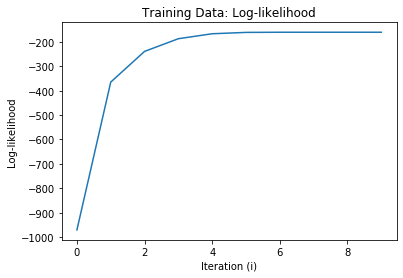

In [10]:
plt.plot(listLwNM)
plt.title("Training Data: Log-likelihood")
plt.xlabel("Iteration (i)")
plt.ylabel("Log-likelihood")

In [11]:
listLwNM

[array([-970.40605278]),
 array([-364.94295715]),
 array([-239.18142495]),
 array([-187.18126378]),
 array([-166.87554308]),
 array([-161.34236543]),
 array([-160.70696185]),
 array([-160.69475058]),
 array([-160.69474479]),
 array([-160.69474479])]

Text(0, 0.5, 'Percent error rate')

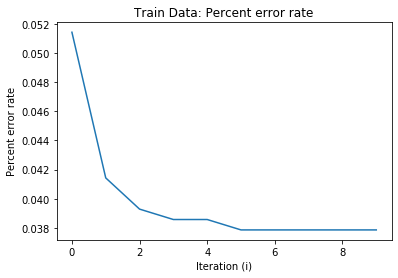

In [12]:
plt.plot(listErrNM)
plt.title("Train Data: Percent error rate")
plt.xlabel("Iteration (i)")
plt.ylabel("Percent error rate")

In [13]:
print("Overall training errors: %f" % predict(trainData, trainLabels, wNM))
print("Training errors on 3: %f" % predict(train3, [0] * train3.shape[0], wNM))
print("Training errors on 5: %f" % predict(train5, [1] * train5.shape[0], wNM))

Overall training errors: 0.037857
Training errors on 3: 0.041429
Training errors on 5: 0.034286


In [14]:
print("Overall testing errors: %f" % predict(testData, testLabels, wNM))
print("Testing errors on 3: %f" % predict(test3, [0] * test3.shape[0], wNM))
print("Testing errors on 5: %f" % predict(test5, [1] * test5.shape[0], wNM))

Overall testing errors: 0.066250
Testing errors on 3: 0.075000
Testing errors on 5: 0.057500


In [16]:
print(np.reshape(wNM, (8, 8)))

[[-0.69867127 -1.79091575 -1.09584693 -1.55932126 -0.61277599 -1.19602757
   0.80498596  1.98171976]
 [-0.3070206  -0.27517389  0.33732158 -0.03484072 -0.70239384  1.00821882
  -1.50068516 -1.51410942]
 [ 4.53841604  1.39877779  1.62987333  0.09538517  1.03756464 -2.47948388
  -2.46695749 -2.94565932]
 [ 0.75360325  0.36371168  0.79407304 -0.36564767 -0.53238143 -2.81308121
   0.5335138  -0.06480436]
 [ 0.6671663   1.33479468  0.11239958 -0.48311693 -0.63105516 -0.03001328
  -0.67690004 -0.06046559]
 [ 1.3431295  -0.30006869 -0.45791014 -0.22792613 -0.05459433 -1.17047615
   1.03809757 -1.8978986 ]
 [ 1.75984949 -0.78118549  1.42577195  0.74181376  0.54108415 -0.47609333
   0.12111255 -1.76659023]
 [ 0.746778    0.36061785  0.78594371  2.71906536  0.43060803  0.75487856
   0.99185847 -0.63375712]]


## Gradient Ascent

In [19]:
numSteps = 5000
wGA, listLwGA, listErrGA = fitByGradientAscent(trainData, trainLabels, numSteps)

100%|██████████| 5000/5000 [05:33<00:00, 15.00it/s]


Text(0, 0.5, 'Log-likelihood')

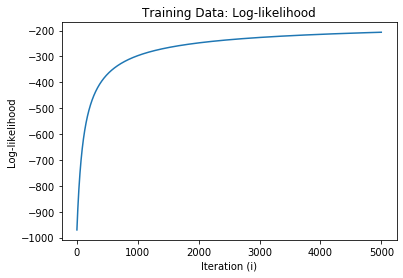

In [25]:
plt.plot(listLwGA)
plt.title("Training Data: Log-likelihood")
plt.xlabel("Iteration (i)")
plt.ylabel("Log-likelihood")

Text(0, 0.5, 'Percent error rate')

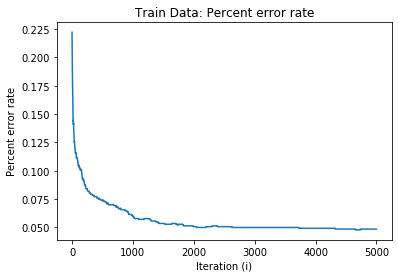

In [26]:
plt.plot(listErrGA)
plt.title("Train Data: Percent error rate")
plt.xlabel("Iteration (i)")
plt.ylabel("Percent error rate")

In [27]:
print("Overall training errors: %f" % predict(trainData, trainLabels, wGA))
print("Training errors on 3: %f" % predict(train3, [0] * train3.shape[0], wGA))
print("Training errors on 5: %f" % predict(train5, [1] * train5.shape[0], wGA))

Overall training errors: 0.048571
Training errors on 3: 0.040000
Training errors on 5: 0.057143


In [28]:
print("Overall testing errors: %f" % predict(testData, testLabels, wGA))
print("Testing errors on 3: %f" % predict(test3, [0] * test3.shape[0], wGA))
print("Testing errors on 5: %f" % predict(test5, [1] * test5.shape[0], wGA))

Overall testing errors: 0.050000
Testing errors on 3: 0.055000
Testing errors on 5: 0.045000


In [29]:
print(np.reshape(wGA, (8, 8)))

[[-0.49193305 -0.65966842 -0.7223213  -0.72228237 -0.64567837 -0.08646325
   0.72635546  1.08336808]
 [ 0.04709087  0.09233954  0.03874838  0.07010507  0.08976206  0.33790368
  -0.4719361  -0.74840364]
 [ 1.09721309  1.05720393  0.95323366  0.46492514  0.12248928 -1.02998908
  -1.86356309 -1.43245458]
 [ 0.57089511  0.614262    0.30632017 -0.14750917 -0.44464301 -0.85832573
  -0.18737441 -0.17581057]
 [ 0.33103994  0.42941207  0.03126704 -0.15017779 -0.38763848 -0.34493502
  -0.07923389 -0.36052367]
 [ 0.57051351 -0.01049043 -0.11463766  0.13256005  0.11773787 -0.14087298
   0.24561884 -0.62976394]
 [ 0.65210195 -0.03155412  0.56103265  0.22852435  0.08686284 -0.04747068
   0.22899518 -0.49004432]
 [ 0.07835427  0.16038637  0.3631225   0.3943969   0.24484612  0.40482018
  -0.00827036 -0.20711491]]
